In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 

In [2]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
random.seed(123)

In [4]:
df = pd.read_csv("covid19vaccinesbycounty-booster-archived - covid19vaccinesbycounty-booster-archived (2) (1).csv")

df['administered_date'] = pd.to_datetime(df['administered_date'], format = "%Y-%m-%d")

df['administered_date'].dtype

dtype('<M8[ns]')

In [5]:

df['percent_dose'] = df['cumulative_booster_recip_count'] / df['booster_eligible_population']

df['percent_dose']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
66087    0.494248
66088    0.494348
66089    0.494498
66090    0.494498
66091    0.494498
Name: percent_dose, Length: 66092, dtype: float64

In [6]:
filtered_df = df[df['county'] == "Alameda"]

filtered_df

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,...,at_least_one_dose,cumulative_at_least_one_dose,california_flag,booster_recip_count,bivalent_booster_recip_count,cumulative_booster_recip_count,cumulative_bivalent_booster_recip_count,booster_eligible_population,bivalent_booster_eligible_population,percent_dose
0,Alameda,2020-01-05,0,0,0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,1405204,1405204,0.000000
1,Alameda,2020-07-27,0,0,0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,1405204,1405204,0.000000
2,Alameda,2020-07-29,0,1,0,0,0,1,0,0,...,0,1,NaN,0,0,0,0,1405204,1405204,0.000000
3,Alameda,2020-07-30,0,1,0,0,0,1,0,0,...,0,1,NaN,0,0,0,0,1405204,1405204,0.000000
4,Alameda,2020-07-31,0,1,0,0,0,1,0,0,...,0,1,NaN,0,0,0,0,1405204,1405204,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14195,Alameda,2023-06-22,707,4627431,464,3040500,242,1412526,0,135586,...,54,1537559,California,283,283,1015614,526946,1405204,1405204,0.722752
14196,Alameda,2023-06-23,697,4628128,440,3040940,255,1412781,0,135586,...,58,1537617,California,263,263,1015877,527209,1405204,1405204,0.722939
14197,Alameda,2023-06-24,105,4628233,59,3040999,46,1412827,0,135586,...,9,1537626,California,41,41,1015918,527250,1405204,1405204,0.722968
14198,Alameda,2023-06-25,63,4628296,47,3041046,16,1412843,0,135586,...,6,1537632,California,17,17,1015935,527267,1405204,1405204,0.722980


(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07')])

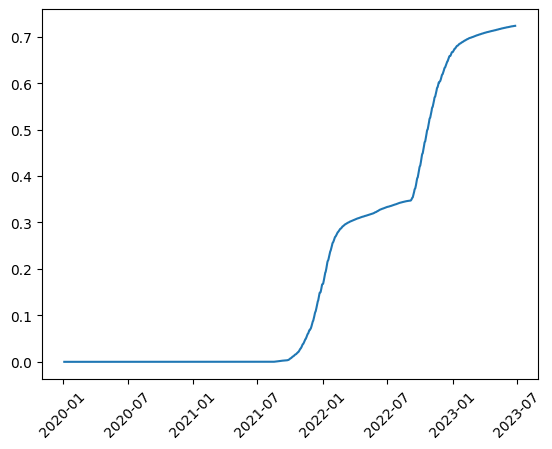

In [7]:
plt.plot(filtered_df['administered_date'], filtered_df['percent_dose'])

plt.xticks(rotation = 45)

In [8]:
df = df[df['percent_dose'] != 0]

df

,county,administered_date,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,...,at_least_one_dose,cumulative_at_least_one_dose,california_flag,booster_recip_count,bivalent_booster_recip_count,cumulative_booster_recip_count,cumulative_bivalent_booster_recip_count,booster_eligible_population,bivalent_booster_eligible_population,percent_dose
451,All CA Counties,2021-08-13,111683,45579552,80796,25899876,26277,17942863,4489,1690363,...,65967,24748089,NaN,930,0,930,0,29032987,29032987,0.000032
452,All CA Counties,2021-08-14,72668,45652220,53206,25953082,17038,17959901,2362,1692725,...,40534,24788623,NaN,1174,0,2104,0,29032987,29032987,0.000072
453,All CA Counties,2021-08-15,40279,45692499,29230,25982312,10100,17970001,906,1693631,...,21123,24809746,NaN,957,2,3061,2,29032987,29032987,0.000105
454,All CA Counties,2021-08-16,96846,45789345,67659,26049971,25356,17995357,3711,1697342,...,50525,24860271,NaN,2305,0,5366,2,29032987,29032987,0.000185
455,All CA Counties,2021-08-17,102147,45891492,70994,26120965,27005,18022362,4013,1701355,...,51397,24911668,NaN,2728,0,8094,2,29032987,29032987,0.000279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66087,Yuba,2023-06-21,2,109403,1,47867,1,56371,0,4837,...,1,44276,California,1,1,19807,6551,40075,40075,0.494248
66088,Yuba,2023-06-22,6,109409,5,47872,1,56372,0,4837,...,0,44276,California,4,4,19811,6555,40075,40075,0.494348
66089,Yuba,2023-06-23,7,109416,6,47878,1,56373,0,4837,...,0,44276,California,6,6,19817,6561,40075,40075,0.494498
66090,Yuba,2023-06-24,1,109417,0,47878,1,56374,0,4837,...,0,44276,California,0,0,19817,6561,40075,40075,0.494498


(array([18901., 18993., 19083., 19174., 19266., 19358., 19448., 19539.]),
 [Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07')])

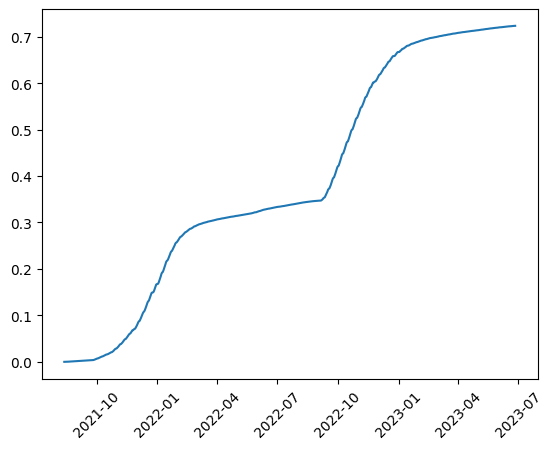

In [9]:
filtered_df = df[df['county'] == "Alameda"]

plt.plot(filtered_df['administered_date'], filtered_df['percent_dose'])

plt.xticks(rotation = 45)

In [10]:
df['county'].unique()

array(['All CA Counties', 'All CA and Non-CA Counties', 'Alpine',
       'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa',
       'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Inyo',
       'Kern', 'Kings', 'Lake', 'Lassen', 'Madera', 'Mariposa',
       'Mendocino', 'Merced', 'Modoc', 'Mono', 'Napa', 'Nevada', 'Plumas',
       'San Benito', 'San Joaquin', 'San Luis Obispo', 'Santa Barbara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tuolumne', 'Unknown',
       'Ventura', 'Yolo', 'Yuba', 'Outside California', 'Alameda',
       'Imperial', 'Los Angeles', 'Marin', 'Monterey', 'Orange', 'Placer',
       'Riverside', 'Sacramento', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Mateo', 'Santa Clara', 'Tulare'],
      dtype=object)

In [11]:
df = df[~df['county'].str.contains("All CA Counties|All CA and Non-CA Counties|Unknown")]

df['county'].unique()

array(['Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa',
       'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Inyo',
       'Kern', 'Kings', 'Lake', 'Lassen', 'Madera', 'Mariposa',
       'Mendocino', 'Merced', 'Modoc', 'Mono', 'Napa', 'Nevada', 'Plumas',
       'San Benito', 'San Joaquin', 'San Luis Obispo', 'Santa Barbara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tuolumne', 'Ventura',
       'Yolo', 'Yuba', 'Outside California', 'Alameda', 'Imperial',
       'Los Angeles', 'Marin', 'Monterey', 'Orange', 'Placer',
       'Riverside', 'Sacramento', 'San Bernardino', 'San Diego',
       'San Francisco', 'San Mateo', 'Santa Clara', 'Tulare'],
      dtype=object)

In [12]:
encoder = LabelEncoder()
df['county_encoded'] = encoder.fit_transform(df[['county']])

C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dangn\AppData\Local\Temp\ipykernel_26820\2891705421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['county_encoded'] = encoder.fit_transform(df[['county']])


In [13]:
df['time_since_start'] = (df['administered_date'] - df['administered_date'].min()).dt.days

C:\Users\dangn\AppData\Local\Temp\ipykernel_26820\2281439779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_since_start'] = (df['administered_date'] - df['administered_date'].min()).dt.days


In [14]:
prep_df = df[['percent_dose', 'time_since_start', 'county_encoded']]

prep_df

,percent_dose,time_since_start,county_encoded
2468,0.003378,13,1
2469,0.003378,15,1
2470,0.005068,17,1
2471,0.005068,18,1
2472,0.006757,20,1
...,...,...,...
66087,0.494248,677,58
66088,0.494348,678,58
66089,0.494498,679,58
66090,0.494498,680,58


In [15]:
time_step = 10

grouped_county = prep_df.groupby('county_encoded')

print(grouped_county)

In [16]:
X = []
y = []


for name, group in grouped_county:
    values = group[['percent_dose', 'time_since_start', 'county_encoded']].values

    for i in range(len(values) - time_step):
        X.append(values[i:i+time_step,:])
        y.append(values[i+time_step, 0])

X = np.array(X)
y = np.array(y)

In [17]:
np.set_printoptions(suppress=True)

X

array([[[  0.00002562,   0.        ,   0.        ],
        [  0.00004981,   1.        ,   0.        ],
        [  0.00007045,   2.        ,   0.        ],
        ...,
        [  0.00050028,   7.        ,   0.        ],
        [  0.00059493,   8.        ,   0.        ],
        [  0.00063336,   9.        ,   0.        ]],

       [[  0.00004981,   1.        ,   0.        ],
        [  0.00007045,   2.        ,   0.        ],
        [  0.00012881,   3.        ,   0.        ],
        ...,
        [  0.00059493,   8.        ,   0.        ],
        [  0.00063336,   9.        ,   0.        ],
        [  0.00072516,  10.        ,   0.        ]],

       [[  0.00007045,   2.        ,   0.        ],
        [  0.00012881,   3.        ,   0.        ],
        [  0.00018431,   4.        ,   0.        ],
        ...,
        [  0.00063336,   9.        ,   0.        ],
        [  0.00072516,  10.        ,   0.        ],
        [  0.00083191,  11.        ,   0.        ]],

       ...,

      

In [18]:
model = Sequential()

model.add(LSTM(20, activation = "relu", input_shape = (X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

C:\Users\dangn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,941 (7.58 KB)

 Trainable params: 1,941 (7.58 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X, y, epochs = 100, batch_size=32, validation_split=0.2)

Epoch 1/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2193.3730 - val_loss: 0.3769
Epoch 2/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7681 - val_loss: 0.1691
Epoch 3/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4472 - val_loss: 0.1951
Epoch 4/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2514 - val_loss: 0.0713
Epoch 5/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1718 - val_loss: 0.0546
Epoch 6/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1259 - val_loss: 0.0626
Epoch 7/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0324 - val_loss: 0.0133
Epoch 8/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0146 - val_loss: 0.0557
Epoch 9/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0123 - val_loss: 0.0276
Epoch 10/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 11/100
991/991 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 12/100
991/991 ━━━━━━━━━━━━━━━━━

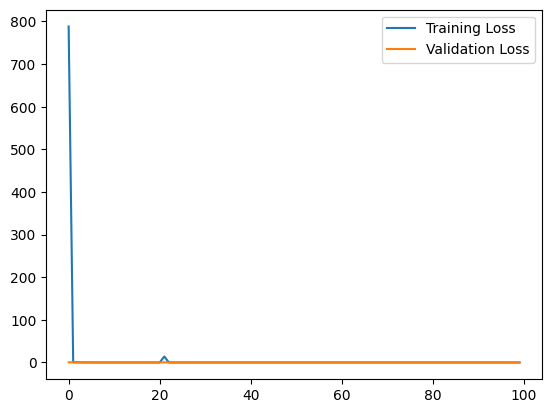

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [21]:
#Forecast for Santa Clara County 

forecast_df = df[['percent_dose', 'time_since_start', 'county_encoded', 'county']]

santa_clara = forecast_df[forecast_df['county'].str.contains("Santa Clara")]

santa_clara

,percent_dose,time_since_start,county_encoded,county
51897,0.000030,0,43,Santa Clara
51898,0.000066,1,43,Santa Clara
51899,0.000094,2,43,Santa Clara
51900,0.000162,3,43,Santa Clara
51901,0.000233,4,43,Santa Clara
...,...,...,...,...
52575,0.729208,678,43,Santa Clara
52576,0.729352,679,43,Santa Clara
52577,0.729384,680,43,Santa Clara
52578,0.729406,681,43,Santa Clara


In [22]:
last_sequence = santa_clara[['percent_dose', 'time_since_start', 'county_encoded']].values[-10:]

print(last_sequence)

last_sequence = last_sequence.reshape((1, 10, 3))

[[  0.72868637 673.          43.        ]
 [  0.72871376 674.          43.        ]
 [  0.7288352  675.          43.        ]
 [  0.72895546 676.          43.        ]
 [  0.72909654 677.          43.        ]
 [  0.72920846 678.          43.        ]
 [  0.72935193 679.          43.        ]
 [  0.72938408 680.          43.        ]
 [  0.72940551 681.          43.        ]
 [  0.72950374 682.          43.        ]]


In [23]:

forecast = 30
forecast_sc = []

for i in range(forecast):
    predicted_percent = model.predict(last_sequence)
    predicted_percent = predicted_percent.reshape((1,1,1))

    #0 batch, -1 last step in the sequence, 1 is the second feature
    increment_day = last_sequence[0, -1, 1] + 1

    new_input = np.array([[[predicted_percent[0,0,0], increment_day,  last_sequence[0, -1, 2]]]])

    last_sequence = np.append(last_sequence[:, 1:, :], new_input , axis = 1)
    forecast_sc.append(predicted_percent[0,0,0])

forecast_sc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

[0.7307086,
 0.7321657,
 0.73380643,
 0.7351088,
 0.73607814,
 0.7369259,
 0.7378671,
 0.7389527,
 0.7401237,
 0.7412428,
 0.742258,
 0.7431914,
 0.7441061,
 0.7450479,
 0.74601674,
 0.7469825,
 0.74791795,
 0.74881643,
 0.74969107,
 0.7505591,
 0.751428,
 0.75229406,
 0.7531487,
 0.75398666,
 0.7548091,
 0.7556208,
 0.7564256,
 0.75722474,
 0.75801617,
 0.7587983]

In [24]:
date_sc = df[df['county'].str.contains("Santa Clara")]

last_date = date_sc['administered_date'].iloc[-1]

last_date

next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')

next_month

C:\Users\dangn\AppData\Local\Temp\ipykernel_26820\3890065695.py:7: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  next_month = pd.date_range(start = last_date, periods = 31, closed = 'right')


DatetimeIndex(['2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-07-01', '2023-07-02', '2023-07-03', '2023-07-04',
               '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-08',
               '2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14', '2023-07-15', '2023-07-16',
               '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20',
               '2023-07-21', '2023-07-22', '2023-07-23', '2023-07-24',
               '2023-07-25', '2023-07-26'],
              dtype='datetime64[ns]', freq='D')

(array([19537., 19539., 19543., 19547., 19551., 19555., 19559., 19563.]),
 [Text(19537.0, 0, '2023-06-29'),
  Text(19539.0, 0, '2023-07-01'),
  Text(19543.0, 0, '2023-07-05'),
  Text(19547.0, 0, '2023-07-09'),
  Text(19551.0, 0, '2023-07-13'),
  Text(19555.0, 0, '2023-07-17'),
  Text(19559.0, 0, '2023-07-21'),
  Text(19563.0, 0, '2023-07-25')])

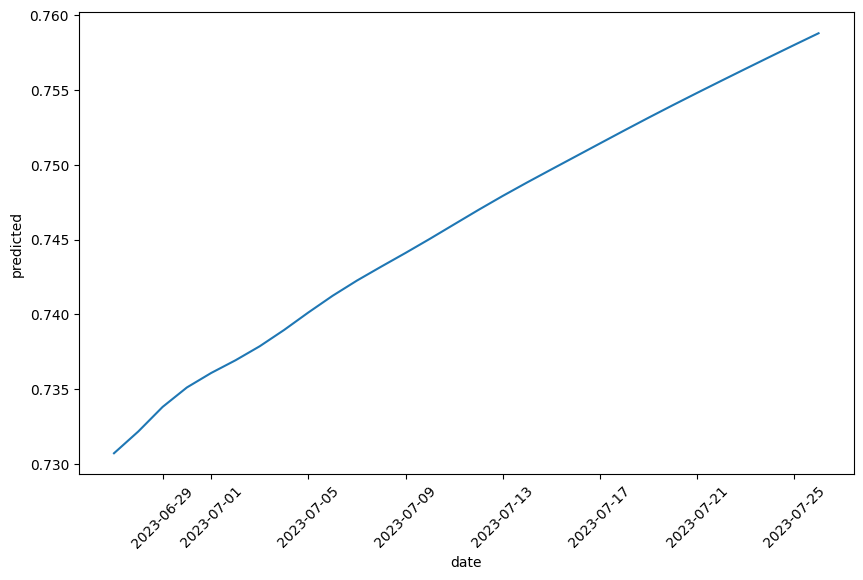

In [25]:
plt.figure(figsize = (10,6))
plt.plot(next_month, forecast_sc)
plt.xlabel('date')
plt.ylabel('predicted')
plt.xticks(rotation = 45)

In [26]:
# model.save('models/multivariate_county.keras')